tidal mask

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter, uniform_filter
import os
import sys

pott_path = os.path.join(os.environ.get('rawdir'),'waom10_2007','Data','waom10','waom10_tds.nc')
pott_ds = xr.open_dataset(pott_path)
grid_path =  os.path.join(os.environ.get('rawdir'),'waom10_2007','Data','waom10','waom10_grd.nc')
grid_ds = xr.open_dataset(grid_path)

mask_tmp = grid_ds.mask_rho.where((grid_ds.zice == 0),0.0)
mask_tmp = mask_tmp.where(grid_ds.h > 1000,0.0)
mask_tmp.values = gaussian_filter(mask_tmp,20)

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


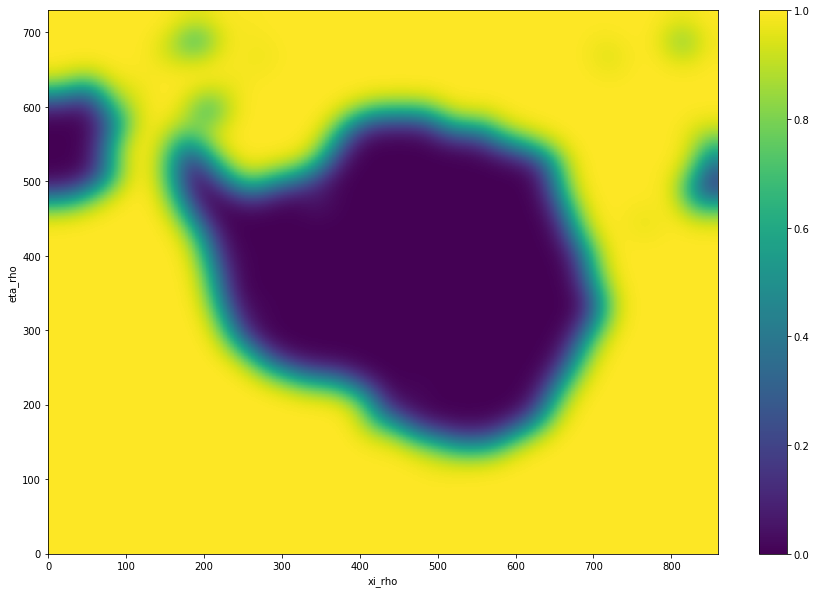

In [2]:
plt.close()
mask_tmp.plot(size=10)
plt.show()

In [4]:
out_path = os.path.join(pott_path,os.pardir,'waom10_ptds_tm_smooth.nc')
pott_ds['tide_Pamp']=pott_ds.tide_Pamp*mask_tmp
pott_ds.to_netcdf(out_path,'w')